In [33]:
from sklearn import datasets 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
cancer = datasets.load_breast_cancer()
lr = LogisticRegression()
model = lr.fit(cancer.data, cancer.target)

print('Accuracy: {:.2f}'. format(model.score(cancer.data, cancer.target)))

Accuracy: 0.95


/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
predict = model.predict(cancer.data)

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(cancer.target, predict)))
print('ROC AUC: {:.2f}'.format(metrics.roc_auc_score(cancer.target, predict)))
print('F1: {:,.2f}'.format(metrics.f1_score(cancer.target, predict)))      
      

Accuracy: 0.95
ROC AUC: 0.94
F1: 0.96


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    test_size=0.2, random_state=12
)

model = lr.fit(x_train, y_train)

print('Train accuracy: {:.2f}'.format(model.score(x_train, y_train)))
print('Test accuracy: {:.2f}'.format(model.score(x_test, y_test)))



Train accuracy: 0.95
Test accuracy: 0.94


/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
# РЕГРЕССИЯ

In [14]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

boston = datasets.load_boston()

lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

for model in [lasso, ridge, elastic]:
    x_train, x_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2)
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    print(model.__class__)
    print('MSE: {:.2f}\n'.format(metrics.mean_squared_error(y_test, predictions)))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 30.16

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 26.62

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 29.04



In [17]:
print('R2: {:.3f}'.format(model.score(x_test, y_test)))
print('R2: {:.3f}'.format(metrics.r2_score(y_test, predictions)))

R2: 0.654
R2: 0.654


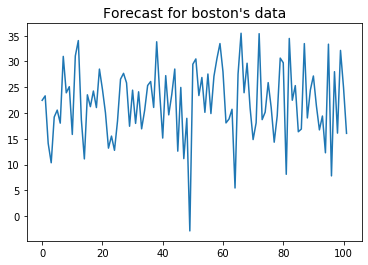

In [28]:
plt.plot(predictions)

plt.title("Forecast for boston's data", size=14);

In [29]:
# КРОСС-ВАЛИДАЦИЯ

In [30]:
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
print(iris.DESCR[:475])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Vi


In [36]:
ls = LogisticRegression()
cv = KFold(n_splits=5)

for split_idx, (train_idx, test_idx) in enumerate(cv.split(iris.data)):
    x_train, x_test = iris.data[train_idx], iris.data[test_idx]
    y_train, y_test = iris.target[train_idx], iris.target[test_idx]
    
    ls.fit(x_train, y_train)
    score = ls.score(x_test, y_test)
    print('Split {} Score: {:.2f}'.format(split_idx, score))
    
    
    

Split 0 Score: 1.00
Split 1 Score: 1.00
Split 2 Score: 0.87
Split 3 Score: 0.93
Split 4 Score: 0.83


/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [37]:
cv_score = cross_val_score(
    ls, iris.data, iris.target,
    scoring = 'accuracy', cv=cv
)

print('Cross val score: {}'.format(cv_score))
print('Mean cross val score: {:.2f}'.format(cv_score.mean()))

Cross val score: [1.         1.         0.86666667 0.93333333 0.83333333]
Mean cross val score: 0.93


/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ayur/opt/anaconda3/envs/coursera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit